<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/ModelTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv 
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split


In [0]:
f1 =[]
l1 =[]

with open('/content/Non_Scaled_June_July_Aug_features (1).bin','rb') as file:
  t_f1=pickle.load(file)

with open('/content/Non_Scaled_June_July_Aug_labels (1).bin','rb') as file:
  l_1=pickle.load(file)

for i in t_f1:
  f1.append(list(map(float,i)))

for i in l_1:
  l1.append(list(map(float,i)))



In [0]:
with open('/content/Non_Scaled_June_July_Aug_features_converted.bin','wb') as file:
    pickle.dump(f1,file)

with open('/content/Labels_June_July_Aug_converted.bin','wb') as file:
    pickle.dump(l1,file)


In [0]:

with open('/content/Non_Scaled_June_July_Aug_features_converted.bin','rb') as file:
  f1 = pickle.load(file)

with open('/content/Labels_June_July_Aug_converted.bin','rb') as file:
  l1 = pickle.load(file)


In [0]:
with open('/content/Non_Scaled_November_features.bin','rb') as file:
  f2 =pickle.load(file)

with open('/content/Labels_November.bin','rb') as file:
  l2 = pickle.load(file)

In [5]:
# print(np.shape(f1))
# print(np.shape(l1))
print(np.shape(f2))
print(np.shape(l2))

(356, 10)
(356, 1)


In [0]:
print(f1)

[[10.0, 13.988058316798687, 18.30630111694336, 83.0, 29.68, 60.0, 4.1, 1001.0, 1.0, 47.0], [10.0, 13.011225805526196, 17.759958267211914, 83.0, 29.68, 60.0, 4.1, 1001.0, 1.0, 47.0], [11.0, 72.93656036709747, 38.76405715942383, 84.0, 30.0, 90.0, 1.5, 1001.0, 1.0, 47.0], [13.0, 35.950088737028686, 29.211015701293945, 63.0, 31.2, 70.0, 3.1, 1000.0, 3.0, 47.0], [15.0, 77.1516869870556, 39.25362014770508, 67.0, 32.03, 70.0, 4.1, 999.0, 2.0, 29.0], [15.0, 83.68864852792969, 46.11984634399414, 67.0, 32.03, 70.0, 4.1, 999.0, 1.0, 29.0], [15.0, 82.21006548149384, 44.386722564697266, 67.0, 32.03, 70.0, 4.1, 999.0, 1.0, 29.0], [16.0, 62.01478424259648, 46.05776596069336, 75.0, 28.91, 60.0, 2.6, 999.0, 2.0, 61.0], [16.0, 67.14272841626783, 53.52329635620117, 75.0, 28.91, 60.0, 2.6, 999.0, 2.0, 61.0], [16.0, 74.12818517502174, 57.449180603027344, 75.0, 28.91, 60.0, 2.6, 999.0, 2.0, 61.0], [16.0, 67.38486811854757, 47.027408599853516, 75.0, 28.91, 60.0, 2.6, 999.0, 2.0, 61.0], [16.0, 65.975706672183

In [0]:
# features = np.vstack((f1,f2))
# pm = np.vstack((l1,l2))

features = f2
pm = l2

In [8]:
print(np.shape(features))
print(np.shape(pm))

(356, 10)
(356, 1)


In [0]:
print(features[2826])

[  10.           59.40373829   43.16773987   28.           26.17
  303.            4.96       1015.            2.           64.06      ]


In [0]:
features = list(map(np.float32,features))
pm = list(map(np.float32,pm))

MAPPING ALL FEATURES INTO INDIVIDUAL COMPONENT SO THAT THEY CAN BE INDIVIDUALLY SCALED 

In [0]:
trans=[]
cont=[]
ent=[]
hours=[]
hum=[]
pressure=[]
tempr=[]
deg=[]
speed=[]
prev=[]

#hours, cont, ent , hum, tempr, deg, speed, pressure,trans,prev

for i in features:
  ent.append(float(i[2]))
  cont.append(float(i[1]))
  trans.append(float(i[8]))
  hours.append(float(i[0]))
  hum.append(float(i[3]))
  pressure.append(float(i[7]))
  tempr.append(float(i[4]))
  deg.append(float(i[5]))
  speed.append(float(i[6]))
  prev.append(float(i[9]))

In [11]:
print(len(trans))
print(len(hours))
print(len(cont))
print(len(ent))
print(len(hum))
print(len(pressure))
print(len(tempr))
print(len(deg))
print(len(speed))
print(len(pm))
print(len(prev))

356
356
356
356
356
356
356
356
356
356
356


In [0]:
from sklearn.preprocessing import MinMaxScaler 

In [0]:
#SCALING 

final_shape=len(hours)

#FEATURES 

trans= np.reshape(trans,(final_shape,1))
hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
tempr = np.reshape(tempr,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))
prev = np.reshape(prev,(final_shape,1))



s1 = MinMaxScaler()
hours = s1.fit_transform(hours)
s2 = MinMaxScaler()
cont = s2.fit_transform(cont)
s3 = MinMaxScaler()
ent = s3.fit_transform(ent)
s4 = MinMaxScaler()
hum = s4.fit_transform(hum)
s5 = MinMaxScaler()
pressure = s5.fit_transform(pressure)
s6 = MinMaxScaler()
tempr = s6.fit_transform(tempr)
s7 = MinMaxScaler()
deg = s7.fit_transform(deg)
s8 = MinMaxScaler()
speed = s8.fit_transform(speed)
s9 = MinMaxScaler()
prev = s9.fit_transform(prev)

 
features = np.hstack((hours, cont, ent , hum, tempr, deg, speed, pressure,trans,prev))



In [14]:
print(np.shape(features))

(356, 10)


In [0]:
#saving the unifomrly scaled data

with open('/content/features_testset.bin','wb') as file:
  pickle.dump(features,file)

with open('/content/labels_testset.bin','wb') as file:
  pickle.dump(pm,file)

11.090390419086336


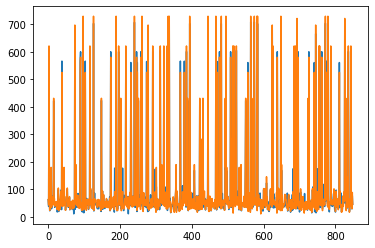

In [0]:

lineareg = LinearRegression(normalize =False)
cross = cross_val_score(lineareg, features,pm, scoring ='neg_mean_absolute_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.3, random_state =42)
lineareg.fit(x_train, y_train)
pred = lineareg.predict(x_test)
plt.plot(pred)
plt.plot(y_test)
print(mean_absolute_error(pred, y_test))


In [0]:
with open('/content/LR_withNOV.bin','wb') as file:
  pickle.dump(lineareg,file)



In [0]:
print(((-1)*cross))

[15.1577209   8.88173878 60.58417485]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

10.098245268385606


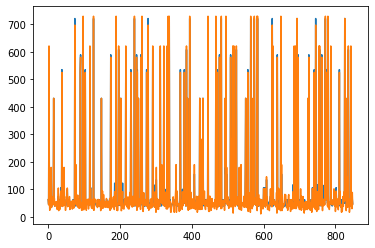

In [0]:
reg = RandomForestRegressor(max_depth=3) 
cross = cross_val_score(reg, features, pm, scoring ='neg_mean_absolute_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.3, random_state =42)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_absolute_error(pred, y_test))


In [0]:
#joblib.dump(reg,'Random_withITO.pkl')
with open('/content/RF_withNOV.bin','wb') as file:
  pickle.dump(reg, file)

In [0]:
print(((-1)*cross))

[ 21.68125841  10.2529219  137.19780183]
